<a href="https://colab.research.google.com/github/mili-b/mili-b/blob/main/DATA201project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# m budhai
# REGENTS EXAM RESULTS FOR NYC SCHOOLS 2014-2015 - 2016-2017
# PROJECT FOCUSES ON MEAN SCORE
#COMPARES STUYVESANT HS WITH ALL HIGH SCHOOLS AND ALL SCHOOLS - Stuyvesant outperforms
#COMPARES THREE TOP SPECIALIZED HIGH SCHOOLS (STUYESANT, BRONX SCIENCE, BROOKLYN TECH) - more competitive but Stuyvesant does best

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

df.shape


(212331, 15)

In [35]:

df.head(5)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [37]:
# MISSING VALUES
missing_values = ["s", "na"]
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', na_values = missing_values)
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,NaN,NaN
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# DROP ROWS WITH 9 MISSING VALUES - TOTAL TESTED TO PERCENT SCORING CR
# college readiness - last 2 columns, have many NANs but will keep to get some general idea of college readiness

df = df.dropna(thresh=9)
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,NaN,NaN
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3.0,33.3,6.0,66.7,0.0,0.0,NaN,NaN
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2.0,13.3,13.0,86.7,5.0,33.3,NaN,NaN
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5.0,55.6,4.0,44.4,1.0,11.1,NaN,NaN


In [39]:

# RENAME COLUMNS 13, 14 - LAST TWO COLUMNS - TO MAKE THEM CLEARER
df = df.rename(columns={'Number Scoring CR': 'Number Scoring College Readiness', 'Percent Scoring CR': 'Percent Scoring College Readiness'})


In [40]:

# CHECK DATA TYPES
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137109 entries, 1 to 212325
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   School DBN                         137109 non-null  object 
 1   School Name                        137109 non-null  object 
 2   School Level                       137109 non-null  object 
 3   Regents Exam                       137101 non-null  object 
 4   Year                               137109 non-null  int64  
 5   Total Tested                       137109 non-null  int64  
 6   Mean Score                         137109 non-null  float64
 7   Number Scoring Below 65            137109 non-null  float64
 8   Percent Scoring Below 65           137109 non-null  float64
 9   Number Scoring 65 or Above         137109 non-null  float64
 10  Percent Scoring 65 or Above        137109 non-null  float64
 11  Number Scoring 80 or Above         1371

In [41]:
# PRINT UNIQUE VARIABLES

print(pd.unique(df['Year']))

[2015 2016 2017]


In [42]:
print(pd.unique(df['Regents Exam']))

['Living Environment' 'Common Core Algebra' 'Common Core Algebra2'
 'Common Core English' 'Common Core Geometry' 'English' 'Geometry'
 'Global History and Geography' 'Integrated Algebra'
 'Physical Settings/Earth Science' 'U.S. History and Government'
 'Algebra2/Trigonometry' 'Physical Settings/Chemistry'
 'Physical Settings/Physics' nan]


In [43]:
print(pd.unique(df['School Level']))

['K-8' 'High school' 'Junior High-Intermediate-Middle' 'Secondary School'
 'K-12 all grades' 'Elementary']


In [44]:
df.isnull().sum()

School DBN                               0
School Name                              0
School Level                             0
Regents Exam                             8
Year                                     0
Total Tested                             0
Mean Score                               0
Number Scoring Below 65                  0
Percent Scoring Below 65                 0
Number Scoring 65 or Above               0
Percent Scoring 65 or Above              0
Number Scoring 80 or Above               0
Percent Scoring 80 or Above              0
Number Scoring College Readiness     67458
Percent Scoring College Readiness    67458
dtype: int64

In [45]:
df.describe()

,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring College Readiness,Percent Scoring College Readiness
count,137109.000000,137109.000000,137109.000000,137109.000000,137109.000000,137109.000000,137109.000000,137109.000000,137109.000000,69651.000000,69651.000000
mean,2015.957574,71.583813,65.998967,25.140297,41.933632,46.443516,58.067855,20.506655,22.692027,29.959340,36.213730
std,0.809287,107.834374,11.288883,37.155199,28.405737,85.187123,28.405517,56.301578,26.160987,68.306798,31.092605
min,2015.000000,6.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,18.000000,58.300000,5.000000,17.500000,8.000000,36.000000,1.000000,2.200000,2.000000,8.800000
50%,2016.000000,39.000000,65.400000,13.000000,40.200000,21.000000,59.800000,5.000000,12.500000,9.000000,29.000000
75%,2017.000000,82.000000,73.400000,31.000000,64.000000,52.000000,82.500000,18.000000,34.500000,31.000000,58.800000
max,2017.000000,1729.000000,98.700000,697.000000,100.000000,1607.000000,100.000000,1365.000000,100.000000,1465.000000,100.000000


In [46]:
# Average of Mean Score over all schools and subjects, by year
# scores steady with slight improvement in 2017
df.groupby(['Year'])['Mean Score'].mean()


Year
2015    65.721566
2016    65.646636
2017    66.708425
Name: Mean Score, dtype: float64

In [47]:
# Average of Mean Scores over all subjects, for High schools
df[df['School Level'] == 'High school']['Mean Score'].mean()

64.39989497671436

In [48]:
# Average of mean scores over all subjects for high schools, grouped by year
# scores steady with slight improvement in 2017
df[df['School Level'] == 'High school'].groupby(['Year'])['Mean Score'].mean()

Year
2015    64.417958
2016    63.944899
2017    64.908444
Name: Mean Score, dtype: float64

In [49]:
# Average of mean scores for Algebra2/Trigonometry for high schools, grouped by year
# Note-even though this gave a result, not sure it is correct - seem like too many rows - 100930

df[df['School Level'] == 'High school'],df[df['Regents Exam'] == 'Algebra2/Trigonometry'].groupby(['Year'])['Mean Score'].mean()


(       School DBN  ... Percent Scoring College Readiness
 20         01M292  ...                               0.0
 21         01M292  ...                              30.0
 22         01M292  ...                              54.7
 23         01M292  ...                               0.0
 25         01M292  ...                              32.4
 ...           ...  ...                               ...
 212088     84X553  ...                               NaN
 212089     84X553  ...                               NaN
 212093     84X553  ...                               NaN
 212094     84X553  ...                               NaN
 212099     84X581  ...                               NaN
 
 [100930 rows x 15 columns], Year
 2015    57.276965
 2016    56.382823
 2017    52.847756
 Name: Mean Score, dtype: float64)

In [50]:
#HIGH SCHOOLS
HighSchools = df[df['School Level'] == 'High school']
HighSchools.head(3)
HighSchools.describe()


,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring College Readiness,Percent Scoring College Readiness
count,100930.000000,100930.000000,100930.000000,100930.000000,100930.000000,100930.000000,100930.000000,100930.000000,100930.000000,51459.000000,51459.000000
mean,2015.943278,80.544536,64.399895,29.440137,45.859519,51.104399,54.141966,22.022243,19.309966,31.917060,31.091966
std,0.805970,121.699059,10.837816,41.083150,27.497200,96.517160,27.496950,63.740971,23.528431,77.038042,28.204015
min,2015.000000,6.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,19.000000,57.200000,7.000000,23.500000,7.000000,33.300000,1.000000,1.300000,2.000000,6.800000
50%,2016.000000,43.000000,63.900000,16.000000,45.000000,21.000000,55.000000,4.000000,10.200000,8.000000,23.800000
75%,2017.000000,91.000000,71.000000,36.000000,66.700000,55.000000,76.500000,17.000000,28.600000,30.000000,50.000000
max,2017.000000,1729.000000,98.700000,697.000000,100.000000,1607.000000,100.000000,1365.000000,100.000000,1465.000000,100.000000


In [51]:

# STUYVESANT HIGH SCHOOL
Stuyvesant = df[df['School DBN'] == '02M475']
Stuyvesant

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring College Readiness,Percent Scoring College Readiness
1511,02M475,Stuyvesant High School,High school,Algebra2/Trigonometry,2015,875,92.9,8.0,0.9,867.0,99.1,819.0,93.6,819.0,93.6
1512,02M475,Stuyvesant High School,High school,Algebra2/Trigonometry,2016,792,93.1,5.0,0.6,787.0,99.4,743.0,93.8,743.0,93.8
1513,02M475,Stuyvesant High School,High school,Common Core Algebra,2015,35,82.3,0.0,0.0,35.0,100.0,20.0,57.1,34.0,97.1
1514,02M475,Stuyvesant High School,High school,Common Core Algebra,2016,144,89.5,0.0,0.0,144.0,100.0,142.0,98.6,144.0,100.0
1515,02M475,Stuyvesant High School,High school,Common Core Algebra,2017,63,93.9,0.0,0.0,63.0,100.0,63.0,100.0,63.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146114,02M475,Stuyvesant High School,High school,U.S. History and Government,2016,20,97.4,0.0,0.0,20.0,100.0,20.0,100.0,NaN,NaN
146115,02M475,Stuyvesant High School,High school,U.S. History and Government,2016,141,97.2,0.0,0.0,141.0,100.0,141.0,100.0,NaN,NaN
146116,02M475,Stuyvesant High School,High school,U.S. History and Government,2017,571,96.7,0.0,0.0,571.0,100.0,571.0,100.0,NaN,NaN
146119,02M475,Stuyvesant High School,High school,U.S. History and Government,2017,29,97.2,0.0,0.0,29.0,100.0,29.0,100.0,NaN,NaN


In [52]:
Stuyvesant.sort_values(['Year', 'Regents Exam'])
#year = 2015 has many entries for each regents subject - confusing at first,
#follow up research suggests missing columns on demographics would explain the multiple entries for example,
# for algebra2/trigonometry for 2015. the total tested = 875 is broken down in the subsequent rows  based on
#differrent demographic criteria

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring College Readiness,Percent Scoring College Readiness
1511,02M475,Stuyvesant High School,High school,Algebra2/Trigonometry,2015,875,92.9,8.0,0.9,867.0,99.1,819.0,93.6,819.0,93.6
22182,02M475,Stuyvesant High School,High school,Algebra2/Trigonometry,2015,869,92.9,8.0,0.9,861.0,99.1,813.0,93.6,813.0,93.6
22183,02M475,Stuyvesant High School,High school,Algebra2/Trigonometry,2015,6,94.5,0.0,0.0,6.0,100.0,6.0,100.0,6.0,100.0
58010,02M475,Stuyvesant High School,High school,Algebra2/Trigonometry,2015,643,93.1,4.0,0.6,639.0,99.4,605.0,94.1,605.0,94.1
58011,02M475,Stuyvesant High School,High school,Algebra2/Trigonometry,2015,232,92.4,4.0,1.7,228.0,98.3,214.0,92.2,214.0,92.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105797,02M475,Stuyvesant High School,High school,U.S. History and Government,2017,318,97.1,0.0,0.0,318.0,100.0,318.0,100.0,NaN,NaN
105798,02M475,Stuyvesant High School,High school,U.S. History and Government,2017,417,96.5,0.0,0.0,417.0,100.0,417.0,100.0,NaN,NaN
146116,02M475,Stuyvesant High School,High school,U.S. History and Government,2017,571,96.7,0.0,0.0,571.0,100.0,571.0,100.0,NaN,NaN
146119,02M475,Stuyvesant High School,High school,U.S. History and Government,2017,29,97.2,0.0,0.0,29.0,100.0,29.0,100.0,NaN,NaN


In [53]:
Stuyvesant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 1511 to 146120
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   School DBN                         271 non-null    object 
 1   School Name                        271 non-null    object 
 2   School Level                       271 non-null    object 
 3   Regents Exam                       271 non-null    object 
 4   Year                               271 non-null    int64  
 5   Total Tested                       271 non-null    int64  
 6   Mean Score                         271 non-null    float64
 7   Number Scoring Below 65            271 non-null    float64
 8   Percent Scoring Below 65           271 non-null    float64
 9   Number Scoring 65 or Above         271 non-null    float64
 10  Percent Scoring 65 or Above        271 non-null    float64
 11  Number Scoring 80 or Above         271 non-null    f

In [54]:
Stuyvesant.describe()

,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring College Readiness,Percent Scoring College Readiness
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,131.000000,131.000000
mean,2015.918819,319.000000,91.697786,0.918819,0.357196,318.081181,99.643173,302.306273,94.226199,300.259542,98.414504
std,0.812436,272.248226,3.353151,1.684586,1.358217,271.445174,1.356609,258.377914,8.390944,280.530036,3.209772
min,2015.000000,6.000000,81.100000,0.000000,0.000000,5.000000,83.300000,3.000000,50.000000,5.000000,83.300000
25%,2015.000000,35.500000,89.350000,0.000000,0.000000,35.500000,99.700000,32.500000,92.250000,31.000000,99.100000
50%,2016.000000,241.000000,92.500000,0.000000,0.000000,241.000000,100.000000,237.000000,97.600000,203.000000,99.800000
75%,2017.000000,553.500000,94.000000,1.000000,0.300000,551.500000,100.000000,519.500000,100.000000,563.500000,100.000000
max,2017.000000,909.000000,97.400000,8.000000,16.700000,909.000000,100.000000,867.000000,100.000000,908.000000,100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58c0ae9490>]],
      dtype=object)

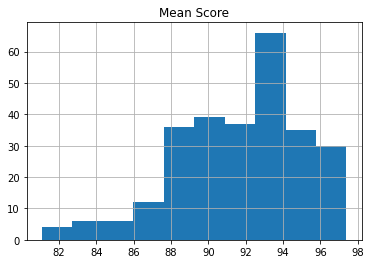

In [55]:
# COMPARISON - STUYVESANT HS, ALL HIGH SCHOOLS, ALL SCHOOLS - MEAN OVERALL SCORES AND HISTOGRAM

#stuyvesant: means: mean overall = 91.7, SD = 3.4, range = 81-97.3; 98.4% college ready
#all high schools:means: mean overall = 64.4, SD = 10.8, range = 15-98.7; 31% college ready
#all schools: means: mean overall = 65.9, SD = 11.3, range = 15-98.7; 36.2% college ready
#these results are not surprising given that stuyvesant is one of the top high schools in NYC

# the histogram of mean scores for stuyvesant is skewed left - more higher performers,
# while the histogram of all schools and high schools are closer to normal distribution - with slight right skew

Stuyvesant.hist('Mean Score')  #histogram of mean scores for Stuyvesant HS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58c0aa6d90>]],
      dtype=object)

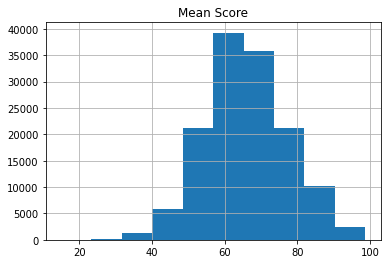

In [56]:
df.hist('Mean Score')  # histogram of mean scores for all schools

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58c15ecb90>]],
      dtype=object)

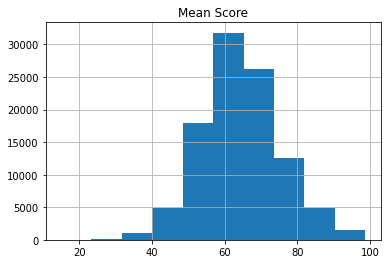

In [57]:
df[df['School Level'] == 'High school'].hist('Mean Score')  # hotgram of mean scores for all high schools

In [58]:
# COMPARISON - STUYVENSANT HS, BRONX SCIENCE HS, BROOKLYN TECH HS (THE TOP THREE SPECIALIZED HIGH SCHOOLS)

# Entry into the specialized high schools is by testing - stuyvesant takes the top scorers, then bronx science, then brooklyn tech
# hence, stuyvesant is considered the most elite, followed by bronx science, then brooklyn tech

#results from the descriptive statistics below appear to support this perception
#stuyvesant: mean overall = 91.7, SD = 3.4, range = 81-97.3; 98.4% college ready
#bronx science:mean overall = 90.2, SD = 4.6, range = 75.5-97.6; 94.9% college ready
#brooklyn tech: mean overall = 85.8, SD = 6.1, range = 65-96; 90.4% college ready

#good next step would be to test if these differences are statistically significant

#the histograms of mean scores for the 3 specialized high schools are skewed left
#while the histograms for all schools and all high schools are more normally distributed
#like stuyvesant, the histograms for mean scores for bronx science and brooklyn tech are skewed left
#the dtudent bodies cluster towards higher performers - not surprising as the students in these
#schools are the stronger performing ones on the specialized high school test and less representative of the
#general school population

Stuyvesant = df[df['School DBN'] == '02M475']
Stuyvesant.describe()

,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring College Readiness,Percent Scoring College Readiness
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,131.000000,131.000000
mean,2015.918819,319.000000,91.697786,0.918819,0.357196,318.081181,99.643173,302.306273,94.226199,300.259542,98.414504
std,0.812436,272.248226,3.353151,1.684586,1.358217,271.445174,1.356609,258.377914,8.390944,280.530036,3.209772
min,2015.000000,6.000000,81.100000,0.000000,0.000000,5.000000,83.300000,3.000000,50.000000,5.000000,83.300000
25%,2015.000000,35.500000,89.350000,0.000000,0.000000,35.500000,99.700000,32.500000,92.250000,31.000000,99.100000
50%,2016.000000,241.000000,92.500000,0.000000,0.000000,241.000000,100.000000,237.000000,97.600000,203.000000,99.800000
75%,2017.000000,553.500000,94.000000,1.000000,0.300000,551.500000,100.000000,519.500000,100.000000,563.500000,100.000000
max,2017.000000,909.000000,97.400000,8.000000,16.700000,909.000000,100.000000,867.000000,100.000000,908.000000,100.000000


In [59]:
BronxScience = df[df['School DBN'] == '10X445']
BronxScience.head(3)
BronxScience.describe()

,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring College Readiness,Percent Scoring College Readiness
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,160.000000,160.000000
mean,2015.942598,276.897281,90.189426,2.205438,1.097281,274.691843,98.903323,252.069486,90.350151,246.600000,94.912500
std,0.808870,257.186058,4.563708,5.387986,2.826566,255.044242,2.825461,234.259422,11.461433,248.376494,10.444099
min,2015.000000,6.000000,75.500000,0.000000,0.000000,5.000000,80.000000,3.000000,37.500000,4.000000,45.500000
25%,2015.000000,36.500000,87.100000,0.000000,0.000000,34.500000,99.400000,32.000000,83.950000,30.750000,97.425000
50%,2016.000000,183.000000,89.800000,0.000000,0.000000,182.000000,100.000000,166.000000,94.400000,151.000000,99.400000
75%,2017.000000,468.000000,93.750000,2.000000,0.600000,462.500000,100.000000,429.000000,99.800000,450.250000,100.000000
max,2017.000000,850.000000,97.600000,34.000000,20.000000,845.000000,100.000000,781.000000,100.000000,783.000000,100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58c0ac6590>]],
      dtype=object)

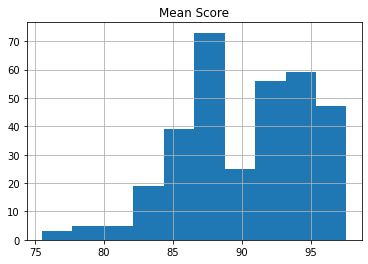

In [60]:

BronxScience.hist('Mean Score')


In [61]:

BrooklynTech = df[df['School DBN'] == '13K430']
BrooklynTech.head(3)
BrooklynTech.describe()

,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring College Readiness,Percent Scoring College Readiness
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,182.000000,182.000000
mean,2015.930362,488.637883,85.789415,17.827298,3.721727,470.810585,96.278552,380.139276,78.089694,383.813187,90.397253
std,0.814085,461.805072,6.080843,41.354081,6.798503,442.192118,6.797885,363.066791,20.509342,403.657954,17.008192
min,2015.000000,6.000000,65.000000,0.000000,0.000000,4.000000,57.100000,2.000000,16.700000,2.000000,27.300000
25%,2015.000000,87.000000,81.100000,0.000000,0.000000,84.000000,94.700000,55.000000,61.250000,46.250000,93.725000
50%,2016.000000,346.000000,85.500000,1.000000,0.400000,342.000000,99.600000,266.000000,84.600000,240.500000,97.700000
75%,2017.000000,836.000000,90.950000,10.500000,5.300000,814.500000,100.000000,628.500000,97.550000,635.250000,99.775000
max,2017.000000,1729.000000,96.100000,289.000000,42.900000,1607.000000,100.000000,1365.000000,100.000000,1465.000000,100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58c08ffe50>]],
      dtype=object)

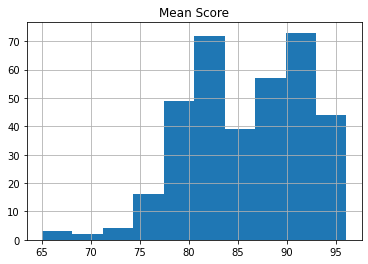

In [62]:

BrooklynTech.hist('Mean Score')


In [63]:
#ARRAY AVERAGE MEAN SCORES FOR ALL REGENTS EXAMS
labels = ['Stuyvesant', 'BronxScience', 'BrooklynTech', 'AllHighSchools', 'AllSchools']
AvgMeanScore = [91.7,90.2,85.7,64.4,65.9]
arr = np.array(AvgMeanScore)
d = {'Stuyvesant':91.7,
     'BronxScience':90.2,
     'BrooklynTech':85.7,
     'AllHighSchools':64.4,
     'AllSchools':65.9}
pd.Series(data=AvgMeanScore, index=labels)


Stuyvesant        91.7
BronxScience      90.2
BrooklynTech      85.7
AllHighSchools    64.4
AllSchools        65.9
dtype: float64

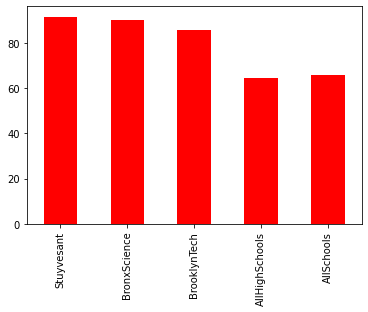

In [64]:
#PLOT AVERAGE MEAN SCORES FOR ALL REGENTS EXAMS
pd.Series(data=AvgMeanScore, index=labels).plot(kind='bar', color='red')
